In [1]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# Carteras con cuatro activos reales

En este notebook, vamos a construir carteras de inversión con cuatro activos reales. Aprenderemos a calcular la rentabilidad y volatilidad usando matrices y a generar múltiples carteras con pesos aleatorios para los activos. 

In [2]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## 1. Descarga de precios

In [3]:
filename="https://raw.githubusercontent.com/alfonso-santos/Python-aplicado-gestion-carteras/fernando/Tema_2/data/tr_eikon_eod_data.csv"
raw = pd.read_csv(filename,index_col=0, parse_dates=True)
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [4]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']
data = raw[symbols].dropna()
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


### Visualización

Vamos a crear un índice para comparar visualmente los activos de la cartera. Dividimos los precios actuales con los del instante de tiempo inicial `data.iloc[0]`.

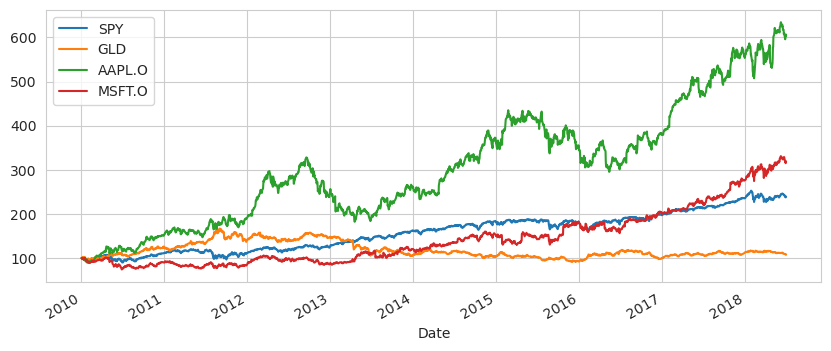

In [5]:
(data / data.iloc[0] * 100).plot(figsize=(10, 4))
plt.show()

Como siempre, vamos a calcular las rentabilidades logarítmicas y posteriormente representar sus histogramas.

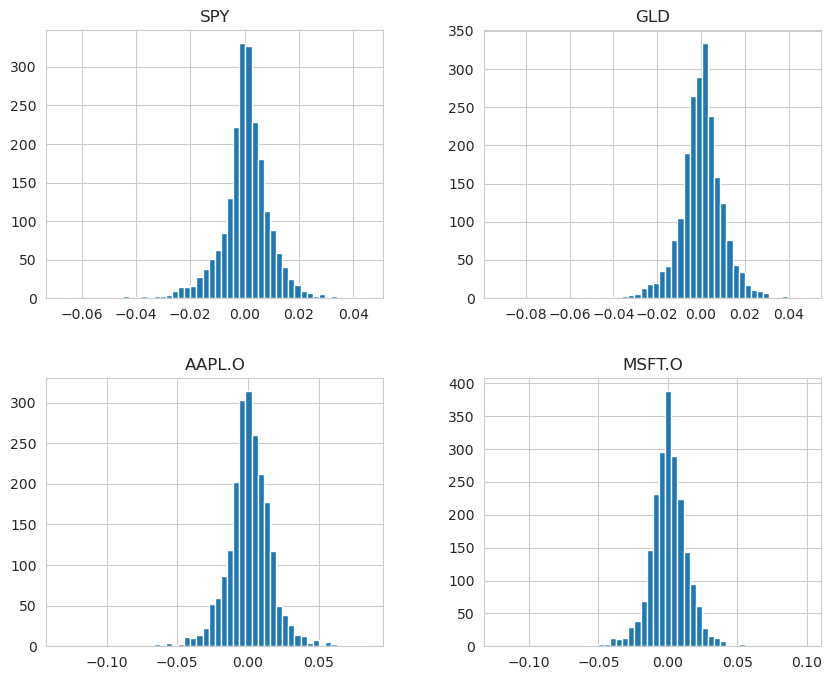

In [6]:
rets = np.log(data).diff().dropna()
rets.hist(bins=50, figsize=(10, 8))
plt.show()

### Ejercicio

A partir de los datos descargados de los cuatro activos, genera 5000 carteras aleatorias y represéntalas.

In [8]:
num_carteras = 5000
num_activos = 4
pesos = np.random.random((num_carteras, num_activos))
pesos = pesos / np.sum(pesos, axis=1, keepdims=True)
pesos.shape

(5000, 4)

In [9]:
rets.shape

(2137, 4)

In [14]:
retornos_diarios_carteras = rets @ pesos.T
retornos_diarios_carteras.shape

(2137, 5000)

In [16]:
retornos_mean_carteras = retornos_diarios_carteras.mean(axis=0)
retornos_mean_carteras.shape

(5000,)

In [17]:
std_carteras = retornos_diarios_carteras.std(axis=0)
std_carteras.shape

(5000,)

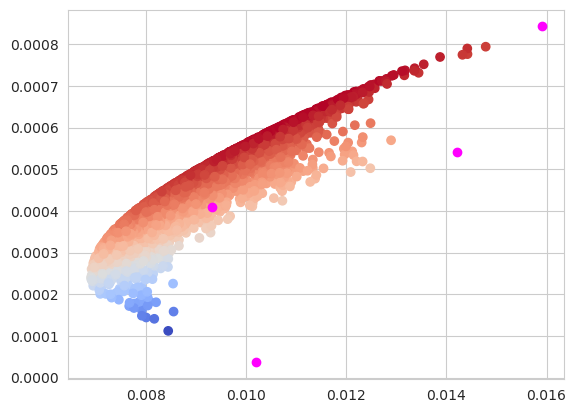

In [24]:
plt.scatter(std_carteras, retornos_mean_carteras, c=retornos_mean_carteras / std_carteras, marker='o', cmap='coolwarm')
for a in rets.columns:
    plt.plot(rets.std()[a], rets.mean()[a], 'o', color="magenta")